In [1]:
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df <- read.csv("C:/Users/user/Downloads/DA-Project/MH3511_R_Project/Cleaned_DS_Jobs.csv", header=TRUE)

head(df, 5)

Job.Title,Salary.Estimate,Job.Description,Rating,Company.Name,Location,Headquarters,Size,Type.of.ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority


In [3]:
df_new <- df %>% select(-c("Salary.Estimate", "Job.Description", "Company.Name", "Industry", "Location", "Headquarters", "same_state"))

head(df_new, 5)

Job.Title,Rating,Size,Type.of.ownership,Sector,Revenue,min_salary,max_salary,avg_salary,job_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
Sr Data Scientist,3.1,1001 to 5000 employees,Nonprofit Organization,Insurance,Unknown / Non-Applicable,137,171,154,NY,27,0,0,0,0,1,0,0,data scientist,senior
Data Scientist,4.2,5001 to 10000 employees,Company - Public,Business Services,$1 to $2 billion (USD),137,171,154,VA,52,0,0,1,0,0,0,1,data scientist,na
Data Scientist,3.8,1001 to 5000 employees,Private Practice / Firm,Business Services,$100 to $500 million (USD),137,171,154,MA,39,1,1,0,0,1,0,0,data scientist,na
Data Scientist,3.5,501 to 1000 employees,Company - Public,Manufacturing,$100 to $500 million (USD),137,171,154,MA,20,1,1,0,0,1,0,0,data scientist,na
Data Scientist,2.9,51 to 200 employees,Company - Private,Business Services,Unknown / Non-Applicable,137,171,154,NY,22,1,1,0,0,0,0,0,data scientist,na


# Job States

In [4]:
state <- as.data.frame(table(df_new$job_state))
state <- state[order(state$Freq, decreasing=TRUE), ]
state

,Var1,Freq
3,CA,165
35,VA,89
15,MA,62
25,NY,52
16,MD,40
11,IL,30
6,DC,26
33,TX,17
36,WA,16
26,OH,14


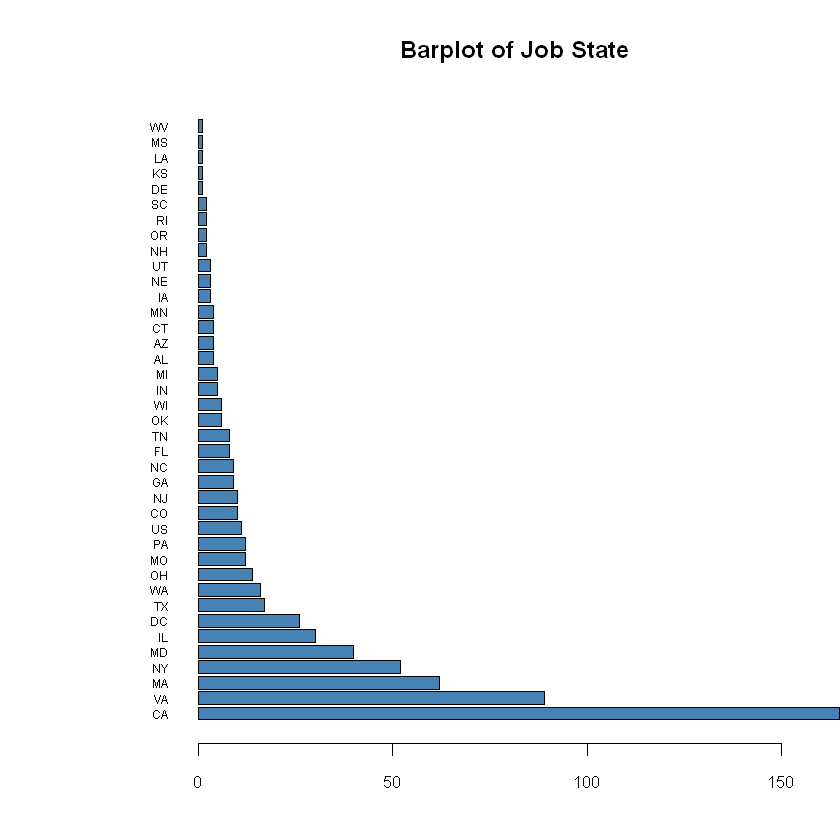

In [5]:
par(mar=c(4, 8, 4, 0)) # set bottom, left, up, and right margins
barplot(state$Freq, names.arg=state$Var1, main="Barplot of Job State", col="steelblue", 
        cex.names=0.6, cex.axis=0.8, horiz=TRUE, las=1) # make barplot and all text labels horizontal

In [6]:
state[state$Freq>=30, ]

,Var1,Freq
3,CA,165
35,VA,89
15,MA,62
25,NY,52
16,MD,40
11,IL,30


In [7]:
names <- c(" CA", " VA", " MA", " NY", " MD", " IL")
df_1 <- df_new[df_new$job_state %in% names, c("job_state", "avg_salary")]
df_1 <- droplevels(df_1) # Important!
head(df_1)

job_state,avg_salary
NY,154
VA,154
MA,154
MA,154
NY,154
CA,154


In [8]:
dim(df_1)

[1] 438   2

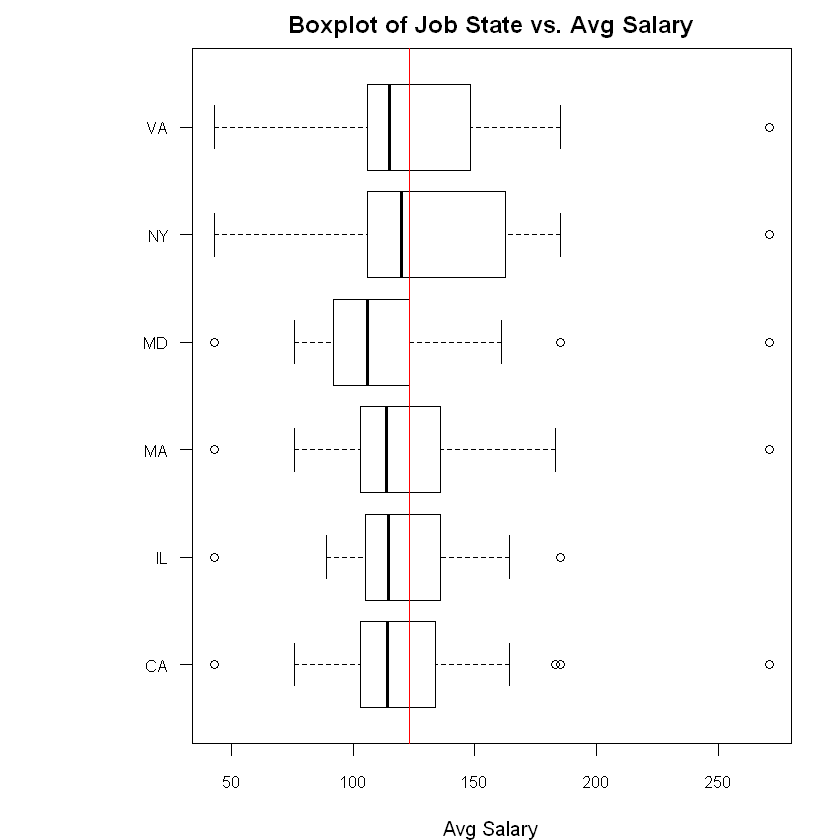

In [9]:
par(mar=c(4, 8, 2, 2))
boxplot(df_1$avg_salary~df_1$job_state, data=df_1, las=1, ylab="", xlab="Avg Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Job State vs. Avg Salary")
abline(v=mean(df_1$avg_salary), col="red")

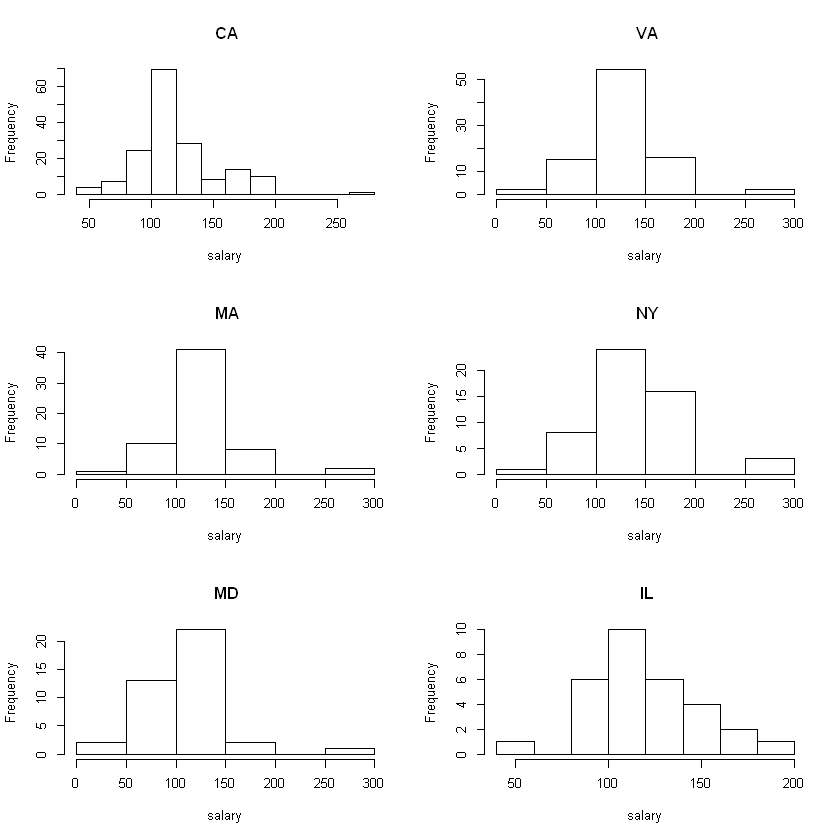

In [10]:
par(mfrow=c(3, 2))
for (state in names) {
    salary <- df_1$avg_salary[df_1$job_state==state]
    hist(salary, main=state)
}

In [11]:
for (state in names) {
    salary <- df_1$avg_salary[df_1$job_state==state]
    print(state)
    print(shapiro.test(salary))
}

[1] " CA"

	Shapiro-Wilk normality test

data:  salary
W = 0.92789, p-value = 2.417e-07

[1] " VA"

	Shapiro-Wilk normality test

data:  salary
W = 0.89204, p-value = 2.029e-06

[1] " MA"

	Shapiro-Wilk normality test

data:  salary
W = 0.79963, p-value = 9.249e-08

[1] " NY"

	Shapiro-Wilk normality test

data:  salary
W = 0.88787, p-value = 0.0001472

[1] " MD"

	Shapiro-Wilk normality test

data:  salary
W = 0.81249, p-value = 1.247e-05

[1] " IL"

	Shapiro-Wilk normality test

data:  salary
W = 0.95604, p-value = 0.2446



We cannot do ANOVA because the test requires that the data is approximately normally distributed and attempts to transform the data have failed. We have to turn to non-parametric tests like the Kruskal-Wallis test.

In [12]:
summary(aov(df_1$avg_salary~df_1$job_state))

                Df Sum Sq Mean Sq F value Pr(>F)  
df_1$job_state   5  16347    3269   2.525 0.0287 *
Residuals      432 559266    1295                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [13]:
pairwise.t.test(df_1$avg_salary, df_1$job_state, p.adjust.method="none")


	Pairwise comparisons using t tests with pooled SD 

data:  df_1$avg_salary and df_1$job_state 

     CA     IL     MA     MD     NY   
 IL 0.9699 -      -      -      -     
 MA 0.7998 0.8917 -      -      -     
 MD 0.1923 0.3257 0.1872 -      -     
 NY 0.0059 0.0598 0.0329 0.0015 -     
 VA 0.1941 0.4390 0.4210 0.0357 0.1238

P value adjustment method: none 

### Conclusion

Uhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh

# Seniority

In [14]:
seniority <- as.data.frame(table(df_new$seniority))
seniority

Var1,Freq
jr,1
na,567
senior,92


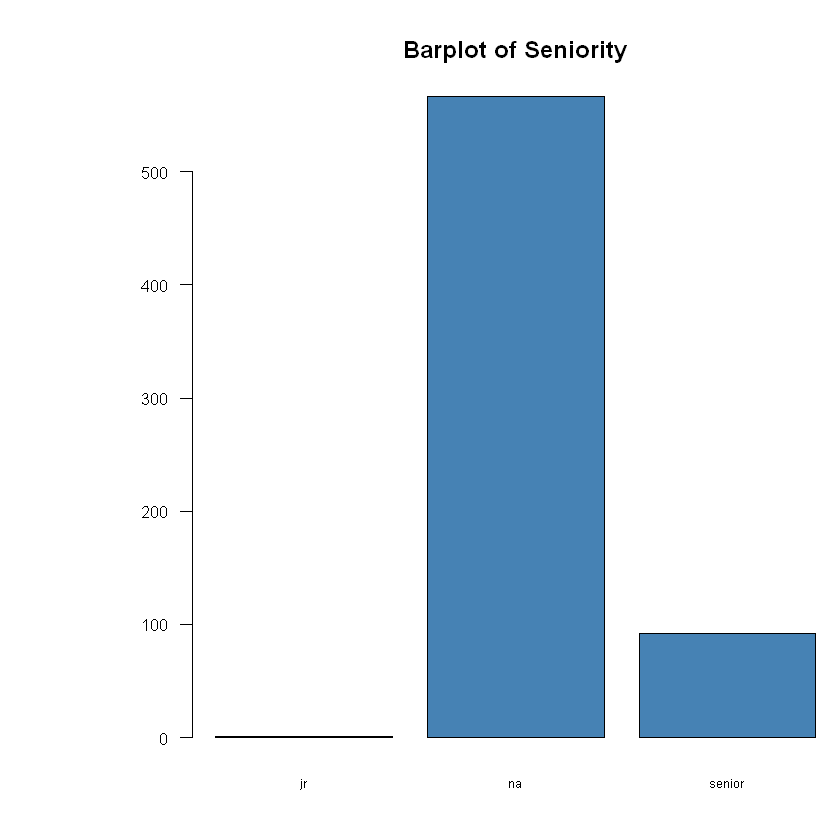

In [15]:
par(mar=c(4, 8, 4, 0)) # set bottom, left, up, and right margins
barplot(seniority$Freq, names.arg=seniority$Var1, main="Barplot of Seniority", col="steelblue", 
        cex.names=0.6, cex.axis=0.8, las=1) # make barplot and all text labels horizontal

In [16]:
class(df_new$seniority)

[1] "factor"

In [17]:
df_2 <- df_new[, c("seniority", "avg_salary")]
df_2$seniority <- ifelse(df_new$seniority=='senior', "Yes", "No")
head(df_2)

seniority,avg_salary
Yes,154
No,154
No,154
No,154
No,154
No,154


In [18]:
dim(df_2)

[1] 660   2

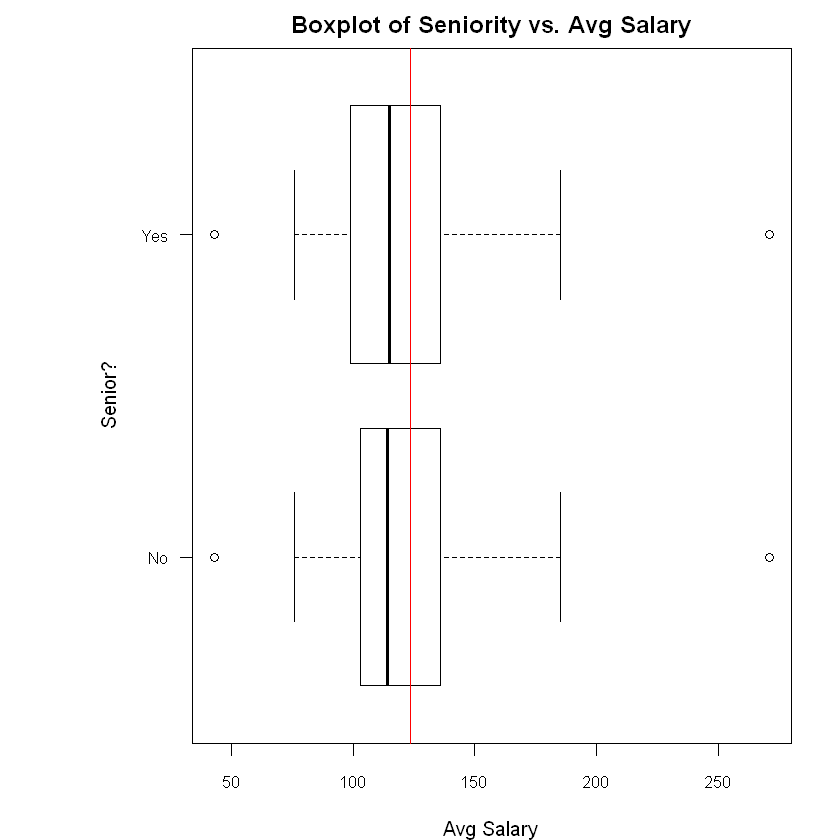

In [19]:
par(mar=c(4, 8, 2, 2))
boxplot(df_2$avg_salary~df_2$seniority, data=df_2, las=1, ylab="Senior?", xlab="Avg Salary", cex.axis=0.8, horizontal=TRUE, 
       main="Boxplot of Seniority vs. Avg Salary")
abline(v=mean(df_2$avg_salary), col="red")

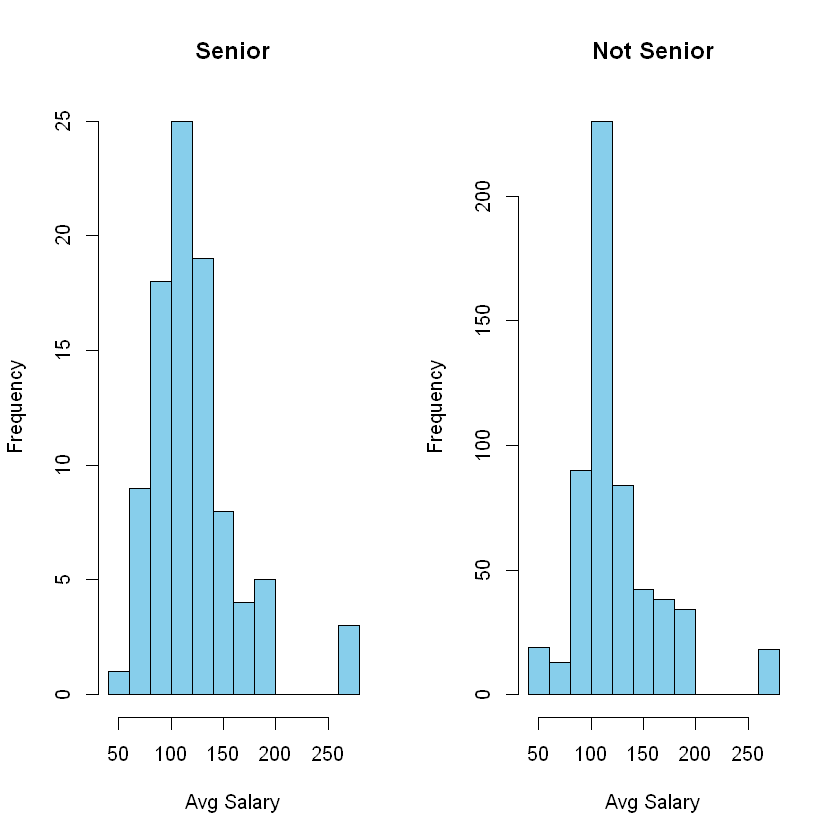

In [20]:
par(mfrow=c(1, 2))
hist(df_2$avg_salary[df_2$seniority=="Yes"], main="Senior", xlab="Avg Salary", col="skyblue", breaks=12)
hist(df_2$avg_salary[df_2$seniority=="No"], main="Not Senior", xlab="Avg Salary", col="skyblue")

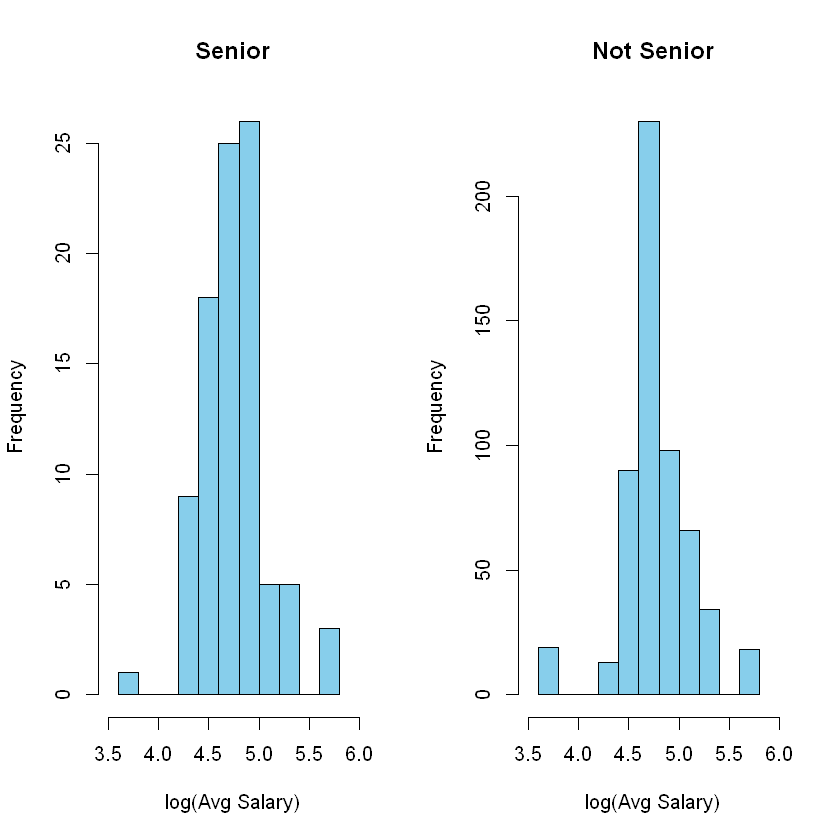

In [21]:
par(mfrow=c(1, 2))
hist(log(df_2$avg_salary[df_2$seniority=="Yes"]), main="Senior", xlab="log(Avg Salary)", xlim=c(3.5, 6), col="skyblue")
hist(log(df_2$avg_salary[df_2$seniority=="No"]), main="Not Senior", xlab="log(Avg Salary)", xlim=c(3.5, 6), col="skyblue")

In [22]:
shapiro.test(log(df_2$avg_salary[df_2$seniority=="Yes"]))


	Shapiro-Wilk normality test

data:  log(df_2$avg_salary[df_2$seniority == "Yes"])
W = 0.95912, p-value = 0.005655


In [23]:
shapiro.test(log(df_2$avg_salary[df_2$seniority=="No"]))


	Shapiro-Wilk normality test

data:  log(df_2$avg_salary[df_2$seniority == "No"])
W = 0.90529, p-value < 2.2e-16


In [24]:
var.test(df_2$avg_salary[df_2$seniority=="Yes"], df_2$avg_salary[df_2$seniority=="No"])


	F test to compare two variances

data:  df_2$avg_salary[df_2$seniority == "Yes"] and df_2$avg_salary[df_2$seniority == "No"]
F = 1.0057, num df = 91, denom df = 567, p-value = 0.941
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7476306 1.4026043
sample estimates:
ratio of variances 
          1.005685 


In [25]:
t.test(df_2$avg_salary[df_2$seniority=="Yes"], df_2$avg_salary[df_2$seniority=="No"], var.equal=TRUE)


	Two Sample t-test

data:  df_2$avg_salary[df_2$seniority == "Yes"] and df_2$avg_salary[df_2$seniority == "No"]
t = -0.20412, df = 658, p-value = 0.8383
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.699638  7.872939
sample estimates:
mean of x mean of y 
 122.8261  123.7394 


# Private vs. Public Companies

In [26]:
owner <- c("Company - Private", "Company - Public")
df_3 <- df_new[df_new$Type.of.ownership %in% owner, c("Type.of.ownership", "avg_salary")]
df_3 <- droplevels(df_3) # Important!
head(df_3)

,Type.of.ownership,avg_salary
2,Company - Public,154
4,Company - Public,154
5,Company - Private,154
6,Company - Private,154
7,Company - Public,154
8,Company - Public,154


In [27]:
dim(df_3)

[1] 538   2

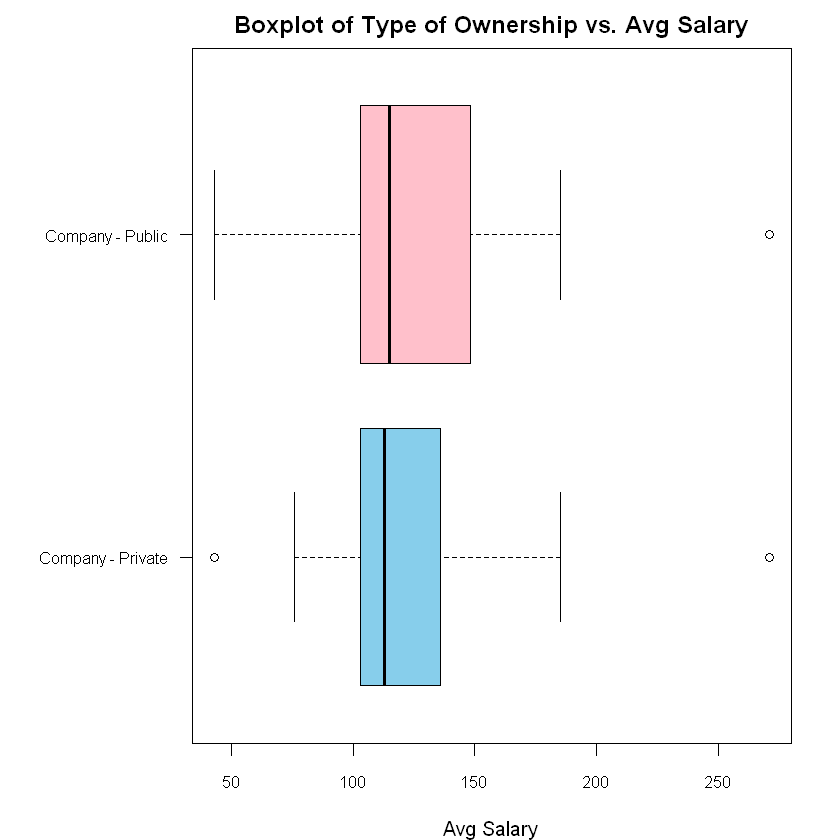

In [28]:
par(mar=c(4, 8, 2, 2))
boxplot(df_3$avg_salary~df_3$Type.of.ownership, data=df_3, las=1, ylab="", xlab="Avg Salary", cex.axis=0.8, horizontal=TRUE, col=c("skyblue", "pink"), 
       main="Boxplot of Type of Ownership vs. Avg Salary")

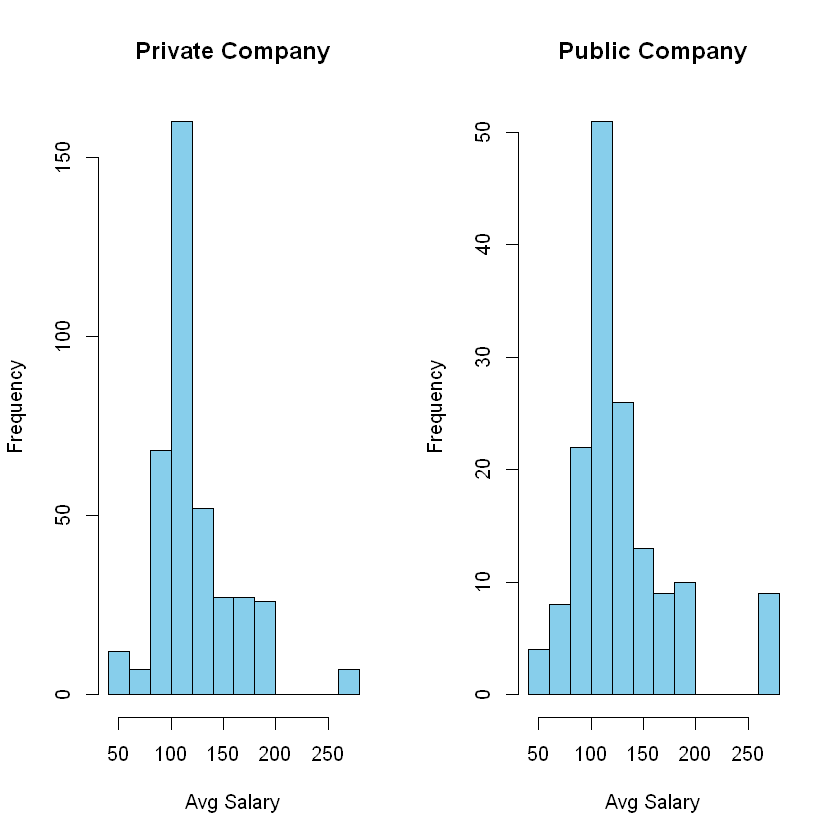

In [29]:
par(mfrow=c(1, 2))
hist(df_3$avg_salary[df_3$Type.of.ownership=="Company - Private"], main="Private Company", xlab="Avg Salary", col="skyblue")
hist(df_3$avg_salary[df_3$Type.of.ownership=="Company - Public"], main="Public Company", xlab="Avg Salary", col="skyblue")

In [30]:
var.test(df_3$avg_salary[df_3$Type.of.ownership=="Company - Private"], df_3$avg_salary[df_3$Type.of.ownership=="Company - Public"])


	F test to compare two variances

data:  df_3$avg_salary[df_3$Type.of.ownership == "Company - Private"] and df_3$avg_salary[df_3$Type.of.ownership == "Company - Public"]
F = 0.60161, num df = 385, denom df = 151, p-value = 0.0001032
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4570468 0.7795224
sample estimates:
ratio of variances 
         0.6016082 


In [31]:
t.test(df_3$avg_salary[df_3$Type.of.ownership=="Company - Private"], 
       df_3$avg_salary[df_3$Type.of.ownership=="Company - Public"], var.equal=FALSE)


	Welch Two Sample t-test

data:  df_3$avg_salary[df_3$Type.of.ownership == "Company - Private"] and df_3$avg_salary[df_3$Type.of.ownership == "Company - Public"]
t = -1.7793, df = 226.04, p-value = 0.07653
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.7679383   0.8040714
sample estimates:
mean of x mean of y 
 121.6891  129.1711 


# Simple Linear Regression - Company Age vs. Rating

In [9]:
data <- df_new[, c("company_age", "Rating")]
head(data)

company_age,Rating
27,3.1
52,4.2
39,3.8
20,3.5
22,2.9
10,4.2


In [17]:
newdata <- data[data$company_age>0 & data$Rating>0, ]
newdata <- log(newdata)
colnames(newdata) <- c("log_Age", "log_Rating")
head(newdata)

log_Age,log_Rating
3.295837,1.131402
3.951244,1.435085
3.663562,1.335001
2.995732,1.252763
3.091042,1.064711
2.302585,1.435085


In [14]:
summary(newdata$log_Rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7419  1.2528  1.3350  1.3416  1.4586  1.6094 

In [13]:
# Fitting Simple Linear Regression
lm.r= lm(formula = log_Rating ~ log_Age,
         data = newdata)
#Summary of the model
summary(lm.r)


Call:
lm(formula = log_Rating ~ log_Age, data = newdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69821 -0.10167  0.01293  0.12126  0.28158 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.440149   0.020490  70.286   <2e-16 ***
log_Age     -0.032116   0.006312  -5.088    5e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.156 on 539 degrees of freedom
Multiple R-squared:  0.04583,	Adjusted R-squared:  0.04406 
F-statistic: 25.89 on 1 and 539 DF,  p-value: 5e-07


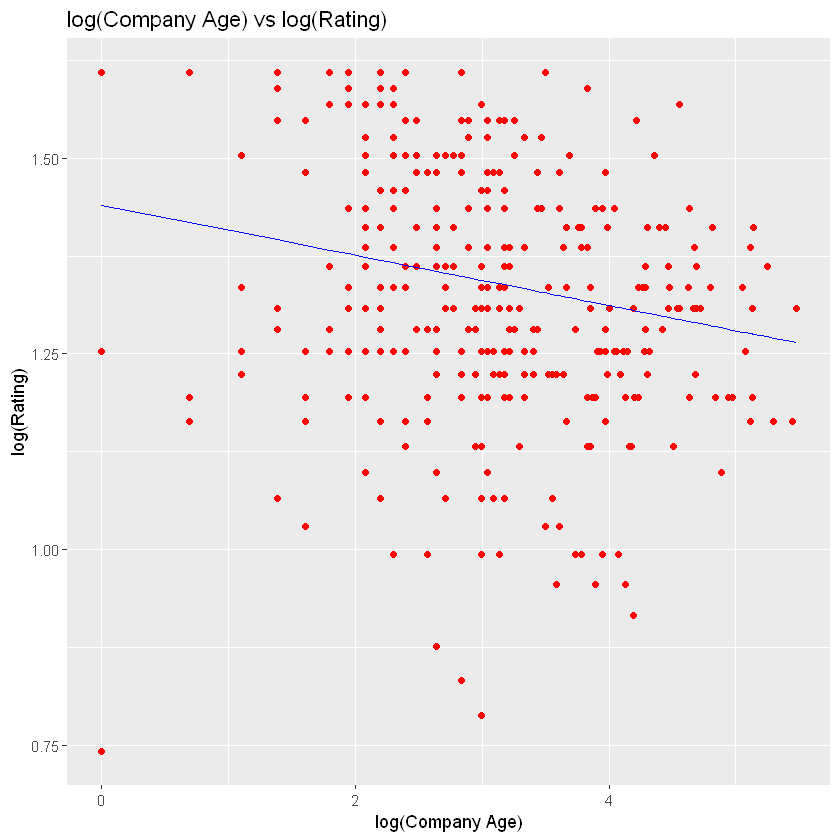

In [16]:
ggplot() + geom_point(aes(x = newdata$log_Age, 
                          y = newdata$log_Rating), colour = 'red') +
  geom_line(aes(x = newdata$log_Age,
                y = predict(lm.r, newdata = newdata)), colour = 'blue') +
   
  ggtitle('log(Company Age) vs log(Rating)') +
  xlab('log(Company Age)') +
  ylab('log(Rating)')